### 1. LOADING FILES

In [1]:
import pickle 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [3]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_auc_score,f1_score,confusion_matrix

In [111]:
lista_modelos=['DTC','RND','BAG','ADA','GBCT','LOGREG','KNN']

In [4]:
train=pd.read_csv('E:\Bootcamp_22\Javier\Repositorios\Machine_Learning\data\df_train.csv',sep=',')
test=pd.read_csv('E:\Bootcamp_22\Javier\Repositorios\Machine_Learning\data\df_test.csv',sep=',')
X_test=test[['Código Distrito Centro','Age_range_code','Nationality_code','Sex_code']]
X_train=train[['Código Distrito Centro','Age_range_code','Nationality_code','Sex_code']]
y_test=test['Código Tipo Supuesto Urgente']
y_train=train['Código Tipo Supuesto Urgente']

In [6]:
print(X_test.shape)
print(X_train.shape)
print(y_test.shape)
print(y_train.shape)

(9477, 5)
(28429, 5)
(9477,)
(28429,)


In [8]:
def load_files(file):
    '''
    Cargar modelos con formato binario en un notebook o fichero python
    '''
    os.chdir('E:\Bootcamp_22\Javier\Repositorios\Machine_Learning\model')
    model = pickle.load( open( file, "rb" ) )
    return model


Aqui vamos a cargar los modelos para pasar los test

In [9]:
ADA = load_files('ADA220909190844.pickle')

In [10]:
ADA

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=10,
                                                         random_state=20),
                   random_state=20)

In [12]:
BAG = load_files('BAG220909190839.pickle')

In [13]:
DTC = load_files('DTC220909190809.pickle')

In [14]:
GBCT=load_files('GBCT220909190855.pickle')

In [15]:
KNN = load_files('KNN220909190918.pickle')

In [16]:
LOGREG = load_files('LOGREG220909190902.pickle')

In [17]:
RND=load_files('RND220909190829.pickle')


### 2. CALCULATING ERROR IN EACH MODEL

In [18]:
def error_modelo(model, X_test, y_test):
    '''
    Dejamos grabada cada uno de los parámetros de cada modelo y hacemos su representación
    '''
    y_pred = model.predict(X_test)
    f1_model=f1_score(y_test, y_pred,average='micro')
#    acc_model=accuracy_score(y_test, y_pred)
    precision_model=precision_score(y_test, y_pred,average='micro')
    recall_model=recall_score(y_test, y_pred,average='micro')
#    roc_auc_model=roc_auc_score(y_test, model.predict_proba(X_test),multi_class='ovr')
    conf_model=confusion_matrix(y_test, y_pred, normalize='true')
#    print('Accuracy', acc_model)
    print('F1', f1_model)
    print('Precision', precision_model)
    print('Recall', recall_model)
    print('-'*30)
#    print('ROC', roc_auc_model)

    plt.figure(figsize=(10,10))
    sns.heatmap(conf_model, annot=True)
    return precision_model, recall_model



**ADA BOOST**

F1 0.765079365079365
Precision 0.765079365079365
Recall 0.765079365079365
------------------------------


(0.765079365079365, 0.765079365079365)

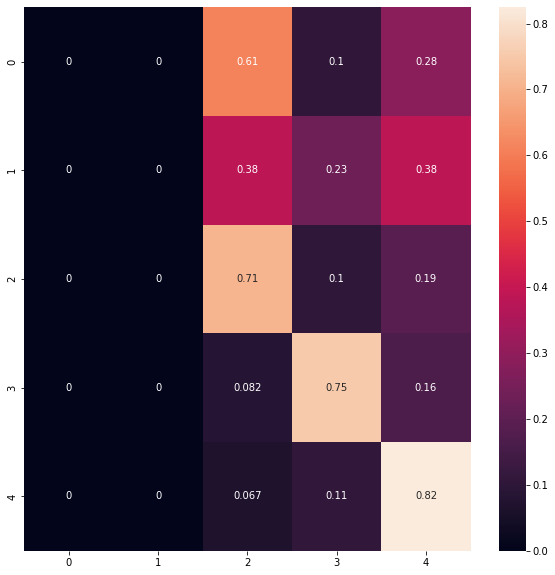

In [133]:
seed= 20
estimator = DecisionTreeClassifier(max_depth=7,random_state=seed)
ADA_m=AdaBoostClassifier(base_estimator = estimator,n_estimators=100,
                             random_state=seed,learning_rate=0.02)
ADA_m.fit(X_train, y_train)
error_modelo (ADA_m, X_test, y_test)

F1 0.7598639455782314
Precision 0.7598639455782313
Recall 0.7598639455782313
------------------------------


(0.7598639455782313, 0.7598639455782313)

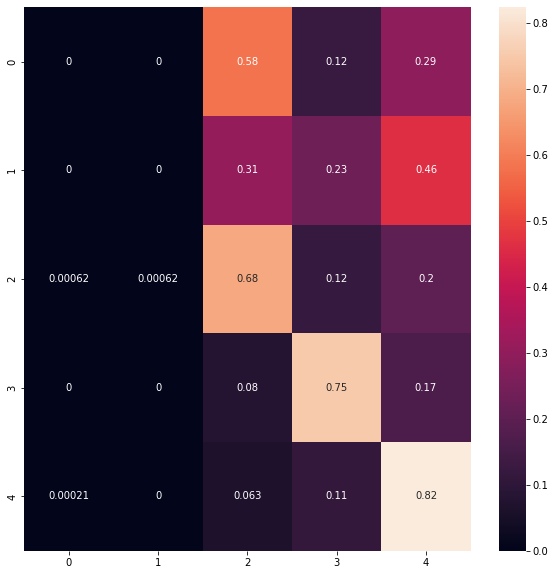

In [19]:
error_modelo(ADA, X_test, y_test)   

Se observa  que se consigue que el f1-score ascienda *0.005 puntos* manipulando manualmente los hiperparámetros del módelo.

**BAG**

F1 0.7662131519274377
Precision 0.7662131519274377
Recall 0.7662131519274377
------------------------------


(0.7662131519274377, 0.7662131519274377)

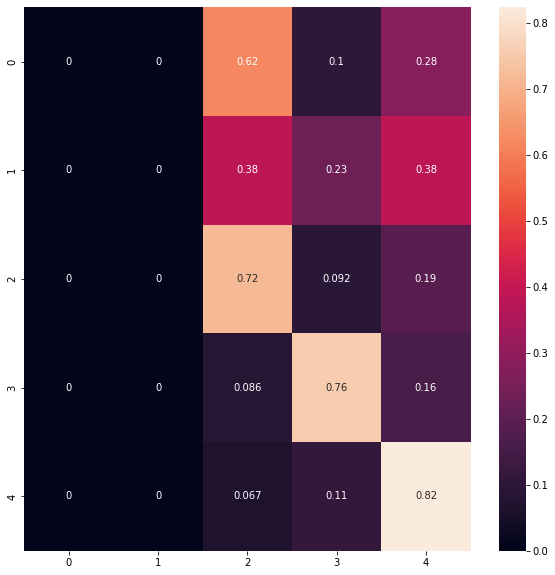

In [141]:
seed= 20
estimator = DecisionTreeClassifier(max_depth=9,random_state=seed)
BAG_m=BaggingClassifier(base_estimator = estimator,random_state=seed,max_features=4,n_estimators=250,max_samples=500)
#        AdaBoostClassifier(base_estimator = estimator,n_estimators=100,
#                             random_state=seed,learning_rate=0.01)
BAG_m.fit(X_train, y_train)
error_modelo (BAG_m, X_test, y_test)

F1 0.7624716553287982
Precision 0.7624716553287982
Recall 0.7624716553287982
------------------------------


(0.7624716553287982, 0.7624716553287982)

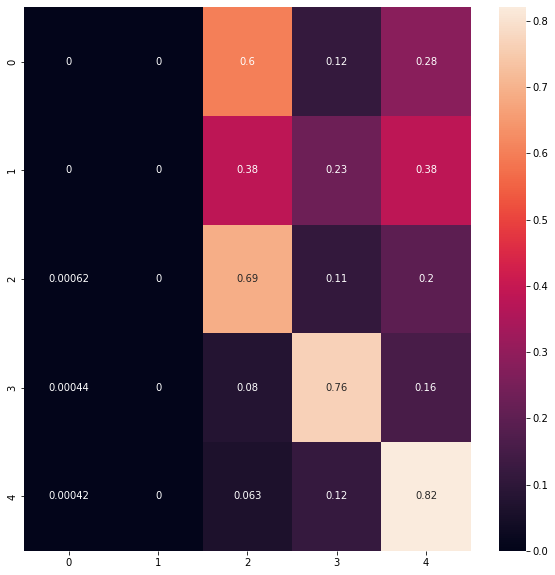

In [21]:
error_modelo(BAG, X_test, y_test)

Se observa  que se consigue que el f1-score ascienda *0.004 puntos* manipulando manualmente los hiperparámetros del módelo.

**DTC**

F1 0.7623582766439909
Precision 0.7623582766439909
Recall 0.7623582766439909
------------------------------


(0.7623582766439909, 0.7623582766439909)

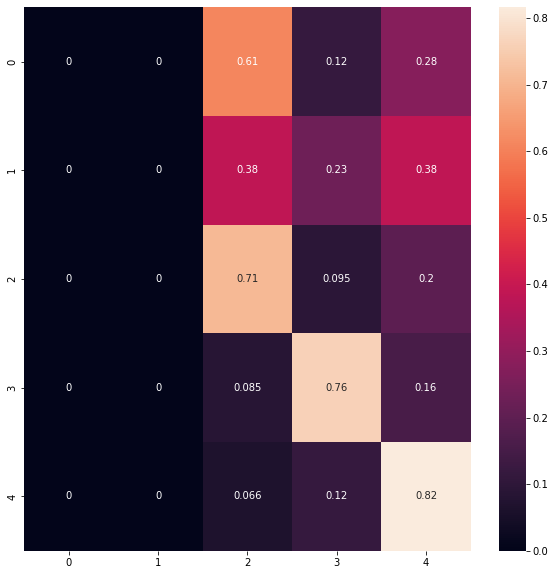

In [72]:
seed= 20
DTC_m=DecisionTreeClassifier(random_state=seed,max_depth=8,min_samples_leaf =50)

DTC_m.fit(X_train, y_train)
error_modelo (DTC_m, X_test, y_test)

F1 0.7605442176870748
Precision 0.7605442176870748
Recall 0.7605442176870748
------------------------------


(0.7605442176870748, 0.7605442176870748)

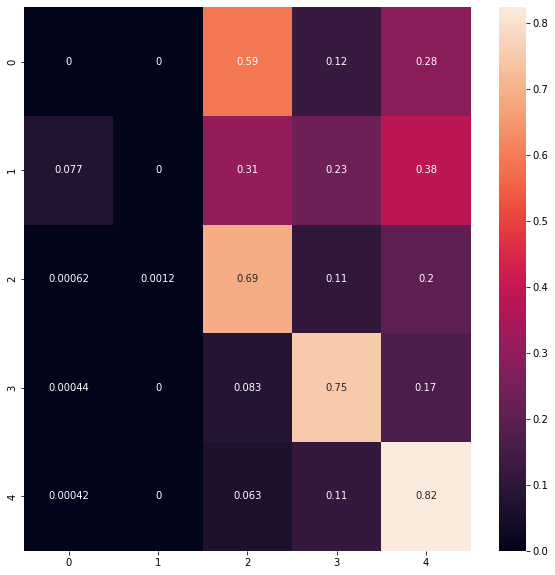

In [73]:
error_modelo(DTC, X_test, y_test)

Se observa  que se consigue que el f1-score ascienda *0.002 puntos* manipulando manualmente los hiperparámetros del módelo.

**RND**

F1 0.7631519274376416
Precision 0.7631519274376417
Recall 0.7631519274376417
------------------------------


(0.7631519274376417, 0.7631519274376417)

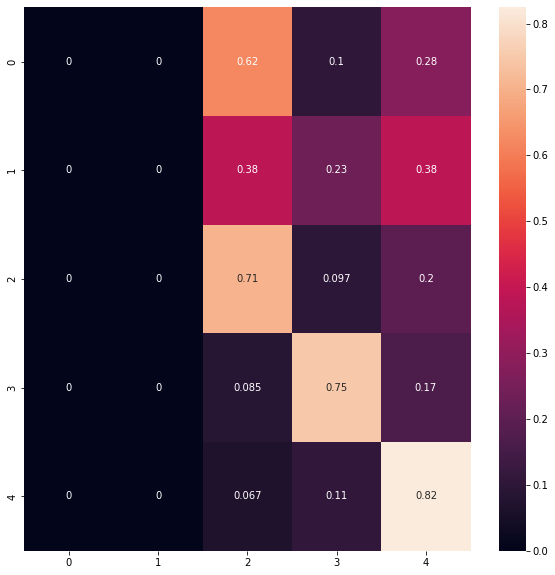

In [101]:
seed= 20

RND_m=RandomForestClassifier(random_state=seed,n_estimators=400,criterion='gini',max_samples=500,max_depth =15)

RND_m.fit(X_train, y_train)
error_modelo (RND_m, X_test, y_test)

F1 0.7605442176870748
Precision 0.7605442176870748
Recall 0.7605442176870748
------------------------------


(0.7605442176870748, 0.7605442176870748)

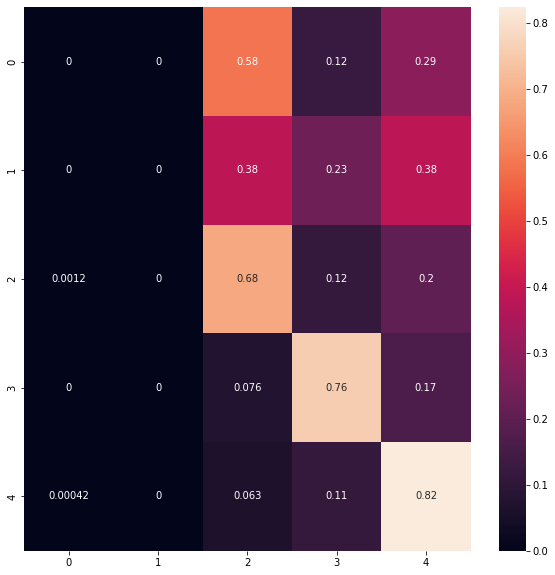

In [75]:
error_modelo(RND, X_test, y_test)

Se observa  que se consigue que el f1-score ascienda *0.003 puntos* manipulando manualmente los hiperparámetros del módelo.

**GBCT**

F1 0.764172335600907
Precision 0.764172335600907
Recall 0.764172335600907
------------------------------


(0.764172335600907, 0.764172335600907)

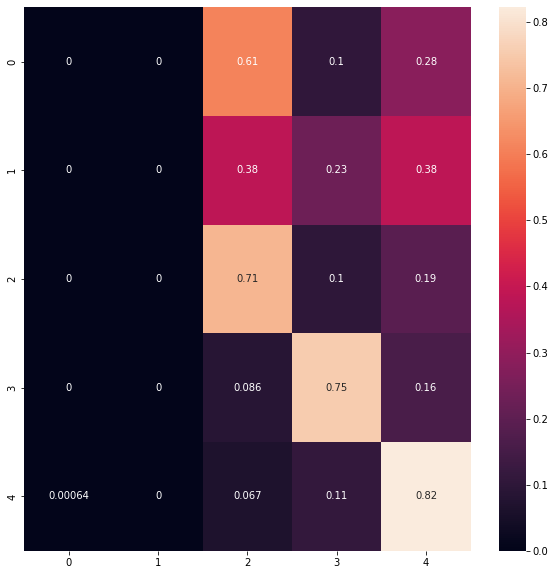

In [130]:
seed= 20

GBCT_m=GradientBoostingClassifier(n_estimators=150,random_state=seed,subsample =0.65,min_samples_leaf =80)

GBCT_m.fit(X_train, y_train)
error_modelo (GBCT_m, X_test, y_test)

F1 0.7631519274376416
Precision 0.7631519274376417
Recall 0.7631519274376417
------------------------------


(0.7631519274376417, 0.7631519274376417)

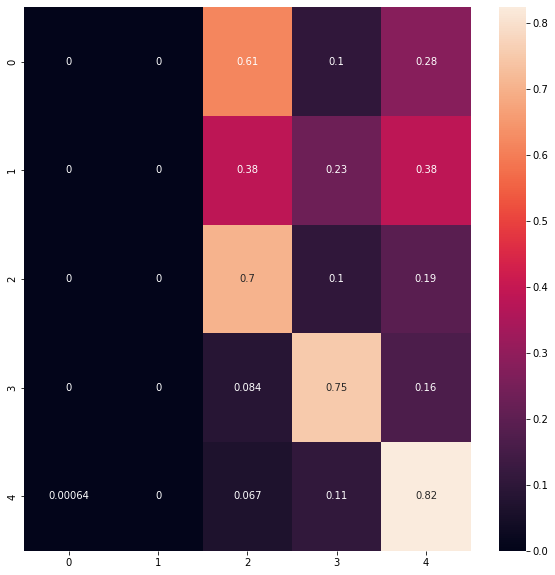

In [103]:
error_modelo(GBCT, X_test, y_test)

Se observa  que se consigue que el f1-score ascienda *0.001 puntos* manipulando manualmente los hiperparámetros del módelo.

In [153]:
pickle.dump(BAG_m,open('my_best_model','wb'))